## 영상정보처리 11주차 과제 템플리트
- 마감: 11월 15일 11시 59분 PM
- 점수: 10점 만점
    
이름: 이상민         
학번: 32153180

입력 이미지 
- airplane_bw.png
- horse_bw.png


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
%cd /gdrive/My\ Drive/ImageProcClass/Week11

image_path_airplane = '../Dongkeun-OpenCV-ImgData/airplane_bw.png'
image_path_horse = '../Dongkeun-OpenCV-ImgData/horse_bw.png'

import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_with_matplotlib_gray(img, title):
  plt.title(title)
  plt.axis('off')
  plt.imshow(img, cmap="gray")

/gdrive/My Drive/ImageProcClass/Week11


##문제 1

위의 두 개의 이미지에 대해 스켈레톤을 구하는 프로세스를 작성하고, 결과를 가시화하시오.   







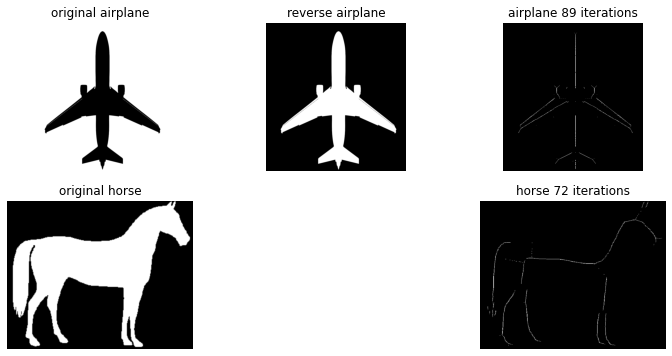

In [3]:
airplane = cv2.imread(image_path_airplane, cv2.IMREAD_GRAYSCALE)
horse = cv2.imread(image_path_horse, cv2.IMREAD_GRAYSCALE)

img_airplane = cv2.bitwise_not(airplane)

ret, air = cv2.threshold(img_airplane, 128, 255, cv2.THRESH_BINARY)
ret2, hor = cv2.threshold(horse, 128, 255, cv2.THRESH_BINARY)
skel_airplane = np.zeros(img_airplane.shape, np.uint8)
skel_horse = np.zeros(horse.shape, np.uint8)

air_b = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(3, 3))
hor_b = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(3, 3))

count_air, count_hor = 0, 0

def skeleton(A, B, skel, count):
  done = True
  while done:
    erode = cv2.erode(A, B)
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, B)
    tmp = cv2.subtract(erode, opening)
    skel = cv2.bitwise_or(skel, tmp)
    A = erode.copy()
    done = cv2.countNonZero(A) != 0

    count += 1

  return count, skel

air_result = skeleton(air, air_b, skel_airplane, count_air)
hor_result = skeleton(horse, hor_b, skel_horse, count_hor)

plt.figure(figsize=(12, 6))
plt.subplot(231)
show_with_matplotlib_gray(airplane, 'original airplane')
plt.subplot(232)
show_with_matplotlib_gray(img_airplane, 'reverse airplane')
plt.subplot(233)
show_with_matplotlib_gray(air_result[1], 'airplane {} iterations'.format(air_result[0]))
plt.subplot(234)
show_with_matplotlib_gray(horse, 'original horse')
plt.subplot(236)
show_with_matplotlib_gray(hor_result[1], 'horse {} iterations'.format(hor_result[0]))
plt.show()